**Data Loading**

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# Data preparation
data_dir = '/content/drive/MyDrive/Dataset_Metal/Dataset'
img_height, img_width = 224, 224  # VGG16 default input size
batch_size = 32

In [9]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 259 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


In [10]:
# Transfer Learning: Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

In [11]:
# Add custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

In [12]:
model = Model(inputs=base_model.input, outputs=output)

In [13]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Epoch 1/10
8/8 [==============================] - 165s 21s/step - loss: 0.6397 - accuracy: 0.6916 - val_loss: 0.6170 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 185s 23s/step - loss: 0.5487 - accuracy: 0.7313 - val_loss: 0.5951 - val_accuracy: 0.5938
Epoch 3/10
8/8 [==============================] - 165s 21s/step - loss: 0.4646 - accuracy: 0.7621 - val_loss: 0.6609 - val_accuracy: 0.5625
Epoch 4/10
8/8 [==============================] - 169s 21s/step - loss: 0.4607 - accuracy: 0.7841 - val_loss: 0.4988 - val_accuracy: 0.7812
Epoch 5/10
8/8 [==============================] - 182s 23s/step - loss: 0.4129 - accuracy: 0.8477 - val_loss: 0.4021 - val_accuracy: 0.8125
Epoch 6/10
8/8 [==============================] - 166s 21s/step - loss: 0.3727 - accuracy: 0.8370 - val_loss: 0.5134 - val_accuracy: 0.6562
Epoch 7/10
8/8 [==============================] - 166s 21s/step - loss: 0.3394 - accuracy: 0.8414 - val_loss: 0.5162 - val_accuracy: 0.8125
Epoch 8/10
8/8 [====

In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

2/2 [==============================] - 38s 18s/step - loss: 0.6422 - accuracy: 0.6825
Test accuracy: 0.682539701461792


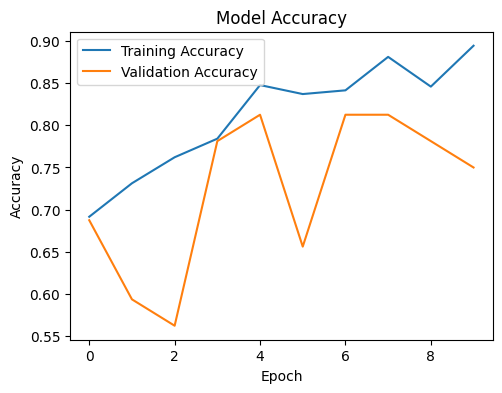

In [17]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()